# Portfolio Allocation - Analysic Mathod for Covariance Matrix 
- ZHANG MIAN
- CentraleSupélec

## 1. Import of libraries and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as sco
import scipy.interpolate as sci
from tqdm import tqdm
import random
from sklearn.isotonic import IsotonicRegression

In [3]:
data = pd.read_csv('/content/drive/MyDrive/SP500_logret.dat', index_col =0)
#data.head()
sp500 = data.dropna(axis = 1)
sp500 = sp500.apply(lambda x : np.exp(x) - 1)
sp500_in = sp500.iloc[1000-126:1000].dropna(axis = 1).copy()
sp500_in_means = sp500_in.mean()
sp500_in_cov = np.cov(sp500_in, rowvar = False, bias = True)
sp500_out = sp500.iloc[1000:1030].copy()
sp500_out_means = sp500_out.mean()
sp500_out_cov = np.cov(sp500_out, rowvar = False, bias = True)
nb_equity = len(sp500_in.T)


In [4]:
sp500_out.head()

,MKC,PGR,MRO,TSCO,K,OXY,NTAP,USB,ADM,ORCL,...,TJX,VRTX,LMT,MCHP,FRC,AGN,MCO,SWK,IFF,INCY
2016-12-21,0.004851,-0.000280,-0.012561,-0.005889,-0.001638,-0.003039,-0.011675,-0.007042,-0.001947,-0.004359,...,-0.002190,-0.050236,-0.004769,-0.001991,-0.002622,0.013902,-0.002687,-0.003669,0.003820,-0.023970
2016-12-22,-0.003862,-0.003079,-0.002212,-0.018545,0.006972,0.002771,-0.004945,-0.000383,-0.020594,0.003348,...,-0.013041,-0.007989,0.001109,0.003222,-0.000986,0.000000,-0.006529,-0.008306,0.009388,0.017141
2016-12-23,0.002046,-0.000561,0.001109,-0.001050,-0.001222,-0.003455,0.002761,0.000959,-0.000664,-0.004620,...,0.000000,0.031797,-0.012698,0.000306,0.004057,0.026238,-0.004590,0.007599,-0.003959,0.014487
2016-12-27,0.000000,0.003652,0.004430,0.005254,0.003806,0.003328,0.007985,0.002107,0.011074,0.001032,...,-0.002486,0.011842,0.005088,0.000000,0.005461,0.007083,0.002935,-0.001714,0.006597,-0.003983
2016-12-28,0.002268,-0.007277,-0.015987,-0.010453,-0.005687,-0.006634,-0.021306,-0.004805,-0.006791,-0.003606,...,-0.012328,-0.007980,-0.005102,-0.011162,-0.002172,0.017806,-0.010554,-0.012018,-0.001848,-0.013947


In [5]:
sp500 = data.dropna(axis = 1)
sp500 = sp500.apply(lambda x : np.exp(x) - 1)
sp500_in = sp500.iloc[1000-126:1000].dropna(axis = 1).copy()
sp500_in

,MKC,PGR,MRO,TSCO,K,OXY,NTAP,USB,ADM,ORCL,...,TJX,VRTX,LMT,MCHP,FRC,AGN,MCO,SWK,IFF,INCY
2016-06-23,0.022262,0.014362,0.035254,0.014644,0.006206,0.015694,0.032949,0.021282,0.016905,0.020495,...,-0.001947,0.034968,0.007684,0.024230,0.021504,0.021702,0.035009,0.012319,0.007363,0.040255
2016-06-24,-0.008105,-0.024931,-0.044532,-0.018495,-0.008223,-0.038820,-0.049961,-0.056121,-0.051745,-0.039187,...,-0.028876,-0.071429,-0.001250,-0.044852,-0.050327,-0.033361,-0.079056,-0.067970,-0.040006,-0.057311
2016-06-27,0.000788,-0.010101,-0.063742,0.011872,-0.004664,-0.028564,-0.071198,-0.029353,-0.033580,-0.019118,...,-0.015136,-0.025153,-0.001710,-0.046364,-0.056812,-0.036505,-0.061713,-0.027884,-0.021123,-0.058976
2016-06-28,0.003640,0.019452,0.081991,0.013671,-0.008721,0.011625,0.009582,0.016782,0.036280,0.016892,...,0.013872,0.045090,0.006770,0.025556,0.052296,0.047085,0.013883,0.018995,0.013299,0.057151
2016-06-29,0.006763,0.020644,0.024357,0.010619,0.018513,0.015141,0.055651,0.015353,0.025148,0.036289,...,0.023608,0.018696,0.013159,0.006888,0.017453,0.012428,0.027834,0.017511,0.021956,0.028206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-14,-0.017182,0.019762,-0.031915,-0.016032,-0.011224,-0.019212,0.005278,0.000580,-0.017457,0.002944,...,-0.012267,0.022585,0.002424,-0.000768,-0.006064,-0.004759,-0.020603,-0.007557,-0.027269,0.008667
2016-12-15,0.002823,0.010829,0.002198,0.010068,0.003966,0.004791,0.022106,0.004833,0.003290,-0.000489,...,0.001552,-0.016341,-0.006540,0.011991,0.012428,0.001144,-0.007081,-0.000338,0.014692,0.021090
2016-12-16,0.000975,0.007048,0.019189,0.001180,-0.001635,0.030014,-0.014598,-0.004617,0.016834,-0.043074,...,-0.008396,-0.003245,-0.002274,-0.019748,-0.009262,0.000986,-0.002997,-0.011764,-0.017975,-0.015108
2016-12-19,0.002055,-0.000840,-0.004303,0.002358,-0.005049,-0.013208,0.007956,0.002513,-0.009460,-0.005115,...,0.002215,-0.006510,0.008397,0.007439,0.014981,-0.001349,-0.005701,0.005738,-0.001186,-0.021456


## 2. Portfolio functions

### 2.1. Return, risk and Sharpe Ratio

In [6]:
def port_ret(weights, rets_means):
    return np.sum(rets_means * weights) * 252

def port_vol(weights, rets_cov):
    return np.sqrt(252* weights.T @ rets_cov @ weights)

def neg_sharpe_ratio(weights, rets_means, rets_cov):  
    return - port_ret(weights, rets_means) / port_vol(weights, rets_cov)  

### 2.2.Porfolio metrics

Some metrics can be used to measure the diversification and leverage of the portfolio. For instance, we define the following metrics:

-  The effective portfolio diversification $N_{eff} = \frac{1}{||\mathbf{w}||_2^2}$. It represents the effective number of stocks with a significant amount of money invested,

-  The number of stocks that account for q percent of the total amount of money invested $N_q = \arg\underset{l}{\min}\Sigma_{i=1}^l|w_i| \geq q ||\mathbf{w}||_1$,

- The gross leverage $G = ||\mathbf{w}||_1^2$. When no short selling is allowed $G=1$. Portfolios with $G > 1$ have an additional intrinsic risk due to high level of short-selling.

In [7]:
def portfolio_metrics(weights, q = 0.9):
    effective_portfolio_diversification = 1/np.linalg.norm(weights)**2
    
    weights_sorted = np.sort(weights)[::-1] #反方向排序
    s = 0
    nstocks_qtotal = 0
    seuil = q * np.linalg.norm(weights, ord = 1) 
    while s < seuil:
        s += np.abs(weights_sorted[nstocks_qtotal])
        nstocks_qtotal += 1
    
    # gross_leverage = np.linalg.norm(weights, ord = 1)
    
    return effective_portfolio_diversification, nstocks_qtotal #, gross_leverage

In [8]:
def calcul_turnover(w_list): 
    n = len(w_list)
    turnover = 0
    for i in range(1, n):
        turnover += np.sum(np.abs(w_list[i-1] - w_list[i]))
    return turnover/n

### 2.3. Efficient Frontier and Portoflios

In [9]:
def efficient_frontier_in_sample(rets_means = sp500_in_means, rets_cov = sp500_in_cov, range_bnds = (0, 1), range_ret = (0.1, 0.4)):
    nb_equity = len(rets_cov)
    eweights = np.array(nb_equity * [1. / nb_equity,])  
    trets = np.linspace(range_ret[0], range_ret[1], 50)
    tvols = []
    
    cons_eff = ({'type': 'eq', 'fun': lambda x:  port_ret(x, rets_means) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
    bnds_eff = tuple(range_bnds for x in range(nb_equity))
    obj_eff = lambda x: port_vol(x, rets_cov)
    
    weights = []
    
    for tret in tqdm(trets):
        res = sco.minimize(obj_eff, eweights, method='SLSQP',
                           bounds=bnds_eff, constraints=cons_eff)  
        tvols.append(res['fun'])
        weights.append(res['x'])
    tvols = np.array(tvols)
    
    return trets, tvols, np.array(weights)

In [10]:
def efficient_frontier_out_sample(weights, rets_means = sp500_out_means, rets_cov = sp500_out_cov):
    ret_out = 252 * weights @ rets_means
    vol_out = np.sqrt(252*(weights @ rets_cov @ weights.transpose()).diagonal())
    return ret_out, vol_out

In [11]:
def Max_SR_portfolio(rets_means = sp500_in_means, rets_cov = sp500_in_cov, range_bnds = (0, 1)):
    nb_equity = len(rets_cov)    
    eweights = np.array(nb_equity * [1. / nb_equity,])  
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
    bnds = tuple(range_bnds for x in range(nb_equity))
    objective_SR = lambda x: neg_sharpe_ratio(x, rets_means, rets_cov)
    
    MSR_pf = sco.minimize(objective_SR, eweights, method='SLSQP', bounds=bnds, constraints=cons) 
    
    return MSR_pf, port_vol(MSR_pf['x'], rets_cov), port_ret(MSR_pf['x'], rets_means)

In [ ]:
nb_equity = 468
eweights = np.array(nb_equity * [1. / nb_equity,])  
eweights

In [13]:
def MV_portfolio(rets_means = sp500_in_means, rets_cov = sp500_in_cov, range_bnds = (0, 1)):
    nb_equity = len(rets_cov)    
    eweights = np.array(nb_equity * [1. / nb_equity,])  
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
    bnds = tuple(range_bnds for x in range(nb_equity))
    
    MV_pf = sco.minimize(port_vol, eweights,rets_cov,
                    method='SLSQP', bounds=bnds, constraints=cons) 
    
    return MV_pf, port_vol(MV_pf['x'], rets_cov), port_ret(MV_pf['x'], rets_means)

In [14]:
a = MV_portfolio(rets_means = sp500_in_means, rets_cov = sp500_in_cov, range_bnds = (0, 1))


In [15]:
def robust_portfolio(rets_means, rets_cov, error_cov, risk_aversion, error_aversion, market_expectations, tracking_error = 0.03):
    nb_equity = len(rets_cov)
    eweights = np.array(nb_equity * [1. / nb_equity,])  
    sigma = rets_cov.diagonal()
    benchmark = eweights.copy()
    w_active = ((market_expectations / sigma) * tracking_error)[0]
    rets_implicit = error_aversion * (error_cov @ w_active) / (np.sqrt(w_active.transpose() @ error_cov @ w_active)) + risk_aversion * rets_cov @ w_active
    
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},
           {'type': 'ineq', 'fun': lambda x:  -(np.std(rets_means * (benchmark - x)) - tracking_error)})  
    bnds = tuple((0,1) for x in range(nb_equity))
    objective = lambda x: -(rets_means @ x - error_aversion*np.sqrt(x.transpose() @ error_cov @ x) - risk_aversion/2 * x.transpose() @ rets_cov @ x)
    
    robust_pf = sco.minimize(objective, eweights, method='SLSQP', bounds=bnds, constraints=cons) 
    
    return w_active, rets_implicit, robust_pf, port_vol(robust_pf['x'], rets_cov), port_ret(robust_pf['x'], rets_means)

## 3. Covariance Cleaning and Noise Filtering Functions

### 3.1. Eigenvalue clipping

When using the in sample covariance matrix, some directions contain more robust information than others. Lower eigenvalues are under-estimated while medium-higher are over-estimated due to some noise component. To avoid over-trusting in a few eigen-directions, and under-trusting in other orthogonal eigen-directions. The simplest filtering approach is clipping the eigenvalue distribution of the correlation matrix.

The eigenvalue clipping consists of averaging the directions on the bulk to reduce the sample-size error. It is done through the following steps:  
1. Determine $\Lambda$ and $\mathbf{V}$ such as $\Lambda$ is diagonal and $\Sigma = \mathbf{V}\cdot\Lambda\cdot\mathbf{V}^T$,  
2. Compute $\Lambda^{(c)}$ a diagonal matrix with:
$$\lambda_i^{(c)} = \frac{\overset{N}{\underset{j=1}{\Sigma}}\lambda_j\delta(\lambda_j<\lambda_{Max})}{\overset{N}{\underset{j=1}{\Sigma}}\delta(\lambda_j<\lambda_{Max})}$$
where $(\lambda_j)_{j\in[1,N]}$ are the eigenvalues of $\Sigma$, and $\delta$ is the Heaviside function,  
3. Compute $\mathbf{C}^{(t)} = \mathbf{V}\cdot\Lambda^{(c)}\cdot\mathbf{V}^T$,  
4. For $i,j\in[1,N]$, compute $C_{i,j}^{(c)} = \frac{C_{i,j}^{(t)}}{C_{i,i}^{(t)}C_{j,j}^{(t)}}$,  
5. Finally, compute the eigenclipped covariance matrix $\Sigma^{(c)}$ knowing that $\forall i,j\in[1,N]$, $\Sigma_{i,j}^{(c)} = C_{i,j}^{(c)}\Sigma_{i,i}\Sigma_{j,j}$.

We can therefore use the in sample eigenvalue clipped covariance matrix when determining our portfolio.

In [16]:
def sigma_c(Sigma):
    # Step 1 : determining Lambda and V
    Lamb = np.diag(np.linalg.eigh(Sigma)[0])
    V = np.linalg.eigh(Sigma)[1]
    # Step 2 : Computing Lambda clipped
    c = np.sum(Lamb.diagonal() * (Lamb.diagonal() < np.max(Lamb))) / (np.sum(Lamb.diagonal() < np.max(Lamb))) * np.ones(len(Lamb.diagonal()))
    Lamb_c = np.diag(c * (Lamb.diagonal() < np.max(Lamb)) + Lamb.diagonal() * (Lamb.diagonal() == np.max(Lamb)))
    # Step 3 : Computing C_t
    C_t = V @ Lamb_c @ V.transpose()
    # Step 4 : Computing C_c
    C_c = np.zeros(shape = (len(C_t), len(C_t)))
    for i in range(len(C_t)):
        for j in range(len(C_t)):
            C_c[i,j] = C_t[i,j]/(C_t[i,i] * C_t[j,j])

    # Step 5 : Computing clipped covariance matrix
    Sigma_in_c = np.zeros(shape = (len(C_t), len(C_t)))
    for i in range(len(C_t)):
        for j in range(len(C_t)):
            Sigma_in_c[i,j] = C_c[i,j] * Sigma[i,i] * Sigma[j,j]
    return Sigma_in_c

### 3.2. Oracle Estimator

The oracle estimator is another way to clean the in sample covariance matrix. Assuming we know the out sample covariance matrix, we would like to adapt the in sample filtered covariance matrix $\Theta$ in order to minimize $d(\Sigma_{out}, \Theta)$. It is obtained with the following steps:  
1. Determine $\Lambda$ and $\mathbf{V}$ such as $\Lambda$ is diagonal and $\Sigma = \mathbf{V}\cdot\Lambda\cdot\mathbf{V}^T$,  
2. Compute $\mathbf{O} = diag((\mathbf{V}^T\cdot\Sigma_{out}\cdot\mathbf{V})_{diagonal}$,  
3. Compute $\Theta = \mathbf{V}\cdot\mathbf{O}\cdot\mathbf{V}^T$.

In [17]:
def oracle_estimator(data_Sigma_in, data_Sigma_out):
    # Step 1 : Compute Lambda and V
    Lamb = np.diag(np.linalg.eigh(data_Sigma_in)[0])
    V = np.linalg.eigh(data_Sigma_in)[1]
    # Step 2 : Compute O
    O = np.diag((V.transpose() @ data_Sigma_out @ V).diagonal())
    # Step 3 : Compute Theta
    Theta = V @ O @ V.transpose()
    return Theta

### 3.3. Cross validate eigenvalue shrinkage

One of the problems encountered during the previous work is eigenvalues equal to $0$. This occurs in low dimensional regime ($T<N$) or when stocks are highly correlated. The former is very common since having $T>>N$ may induce including some historical patterns that are totally unrelated to the current market states. 

This part addresses the zero eigenvalues issue using the Cross-Validate Eigenvalue Shrinkage method. It is a cross validation mehtod in which the in-sample is split in two sets ($in\_sample^*$ and $out\_sample^*$) that don't preserve the temporal order. Let's see how to implement it.  
1. In iteration $i$, split the in-sample in $in\_sample^*$ and $out\_sample^*$:  
  - $in\_sample^*$ is a sorted sub-sample of in-sample and $out\_sample^*$ is the left-out,  
  - $out\_sample^*$ should be more than 10\% of in-sample and should be too small,  
  
  
2. In iteration $i$, determine $\Lambda_{in^*_i}$ and $\mathbf{V}_{in^*_i}$ such as $\Lambda_{in^*_i}$ is diagonal and $\Sigma_{in^*_i} = \mathbf{V}_{in^*_i}\cdot\Lambda_{in^*_i}\cdot\mathbf{V}_{in^*_i}^T$,
3. In iteration $i$, compute $\Lambda_{CV_{i}}^{(t)} = (\mathbf{V}_{in^*_i}^T\cdot\Sigma_{out^*_i}\cdot\mathbf{V}_{in^*_i})_{diagonal}$,  
4. Compute $\Lambda_{CV}^{(t)} = \overline{\Lambda_{CV}^{(t)}}$. It is the average of the $\Lambda_{CV_{i}}^{(t)}$.

At this stage, the average computed eigenvalues are not monotonically decreasing. Therefore, we use the *Isotonic Regression* from the *scikit learn* library. In brief, it is a technique of fitting a free-form line to a sequence of observations such that the fitted line is non-decreasing (or non-increasing) everywhere, and lies as close to the observations as possible.

5. Compute $\Lambda_{CV}^{(ISO)}$ with the *Isotonic Regression* function,  
6. Determine $\Lambda_{in}$ and $\mathbf{V}_{in}$ such as $\Lambda_{in}$ is diagonal and $\Sigma_{in} = \mathbf{V}_{in}\cdot\Lambda_{in}\cdot\mathbf{V}_{in}^T$,  
7. The CV estimator is defined as follows: $$\Sigma_{CV} = \mathbf{V}_{in}\cdot diag(\Lambda_{CV}^{(ISO)})\cdot\mathbf{V}_{in}^T\quad .$$

If the sample-size error is the only source of noise, then the estimator converges to the oracle estimator.

In [18]:
def CVshrink(data_in, iters = 100):
    len_star_out = max(10, len(data_in)//10) 
    index_in = list(data_in.index)
    Lambda_cv_list = []
    
    for j in range (0, iters):
        # Split randomly the in_sample into in_sample* and out_sample*
        index_star_out = sorted(random.sample(index_in, k = len_star_out))
        index_star_in = [i for i in index_in if i not in index_star_out]
        in_star = data_in.loc[index_star_in,:].copy()
        out_star = data_in.loc[index_star_out,:].copy()
    
        # Compute the covariances 
        sigma_in_star = np.cov(in_star, rowvar = False, bias = True)
        sigma_out_star = np.cov(out_star, rowvar = False, bias = True)
        
        # Compute Lambda_CV_j^t
        V_in_star = np.linalg.eigh(sigma_in_star)[1]
        Lambda_cv_j = (V_in_star.transpose() @ sigma_out_star @ V_in_star).diagonal()
        Lambda_cv_list.append(Lambda_cv_j)
    
    Lambda_cv = np.array(Lambda_cv_list).mean(axis = 0)
    
    # Compute Lambda_CV^ISO
    ir = IsotonicRegression()
    Lambda_cv_ISO = ir.fit_transform(np.arange(1, len(Lambda_cv) + 1), Lambda_cv)
    
    # Compute Sigma_CV
    V_in = np.linalg.eigh(np.cov(data_in, rowvar = False, bias = True))[1]
    Sigma_cv = V_in @ np.diag(Lambda_cv_ISO) @ V_in.transpose()
    
    return Lambda_cv, Lambda_cv_ISO, Sigma_cv

###3.4. Results

To simplify and have interpretable results, we will consider from now on only the first 10 equities of our dataframe ('MKC', 'PGR', 'MRO', 'TSCO', 'K', 'OXY', 'NTAP', 'USB', 'ADM', 'ORCL').

In [19]:
sp500 = sp500.iloc[:, :10].copy()
sp500_in = sp500_in.iloc[:, :10].copy()
sp500_in_means = sp500_in.mean()
sp500_in_cov = np.cov(sp500_in, rowvar = False, bias = True)
sp500_out = sp500_out.iloc[:, :10].copy()
sp500_out_means = sp500_out.mean()
sp500_out_cov = np.cov(sp500_out, rowvar = False, bias = True)
nb_equity = len(sp500_in.T)

###3.5. Portfolios with unfiltered covariance matrix

In [20]:
trets_unfiltered, tvols_unfiltered, weights_unfiltered = efficient_frontier_in_sample(rets_means = sp500_in_means, rets_cov = sp500_in_cov, range_ret = (0.05, 0.7))

100%|██████████| 50/50 [00:04<00:00, 11.46it/s]


In [21]:
ret_out_unfiltered, vol_out_unfiltered = efficient_frontier_out_sample(weights_unfiltered, sp500_out_means, sp500_out_cov)

In [22]:
MV_pf_unfiltered, MV_vol_unfiltered, MV_ret_unfiltered = MV_portfolio(sp500_in_means, sp500_in_cov)

In [23]:
MSR_pf_unfiltered, MSR_vol_unfiltered, MSR_ret_unfiltered = Max_SR_portfolio(sp500_in_means, sp500_in_cov)

In [24]:
market_expectations = np.array([[0.0,0.75,0.75,-0.45,-0.5, 0, 0.5, 0, -0.5, 0.4]])  
w_active_unfiltered, rets_implicit_unfiltered, robust_pf_unfiltered, robust_vol_unfiltered, robust_ret_unfiltered = robust_portfolio(sp500_in_means, sp500_in_cov, sp500_in_cov, 13, 0.2, market_expectations)

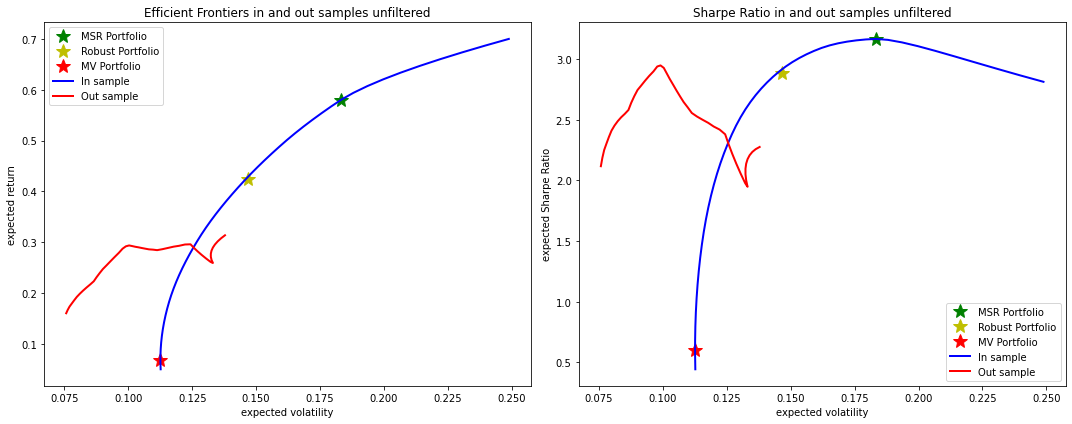

In [25]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(MSR_vol_unfiltered, MSR_ret_unfiltered, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax1.plot(robust_vol_unfiltered, robust_ret_unfiltered, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax1.plot(MV_vol_unfiltered, MV_ret_unfiltered, 'r*', markersize=15.0, label = 'MV Portfolio')
ax1.plot(tvols_unfiltered, trets_unfiltered, 'b', lw= 2.0, label = 'In sample')
ax1.plot(vol_out_unfiltered, ret_out_unfiltered, 'r', lw= 2.0, label = 'Out sample')
ax1.set_xlabel('expected volatility')
ax1.set_ylabel('expected return')
ax1.legend(loc = 'best')
ax1.set_title("Efficient Frontiers in and out samples unfiltered")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(MSR_vol_unfiltered, MSR_ret_unfiltered/MSR_vol_unfiltered, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax2.plot(robust_vol_unfiltered, robust_ret_unfiltered/robust_vol_unfiltered, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax2.plot(MV_vol_unfiltered, MV_ret_unfiltered/MV_vol_unfiltered, 'r*', markersize=15.0, label = 'MV Portfolio')
ax2.plot(tvols_unfiltered, trets_unfiltered/tvols_unfiltered, 'b', lw= 2.0, label = 'In sample')
ax2.plot(vol_out_unfiltered, ret_out_unfiltered/vol_out_unfiltered, 'r', lw= 2.0, label = 'Out sample')
ax2.set_xlabel('expected volatility')
ax2.set_ylabel('expected Sharpe Ratio')
ax2.legend(loc = 'best')
ax2.set_title("Sharpe Ratio in and out samples unfiltered")

plt.tight_layout()
# plt.savefig('../../images/ch13/stat_13.png')
plt.show()



In [26]:
print(f"The MV portfolio has the following weights\n{np.round(MV_pf_unfiltered['x'],2)},\nhas a risk of {np.round(MV_vol_unfiltered * 100,2)}% and a return of {np.round(MV_ret_unfiltered * 100,2)}%.\nIt also has an effective diversification of {np.round(portfolio_metrics(MV_pf_unfiltered['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MV_pf_unfiltered['x'])[1],2)} stocks.\n")
print(f"The maximum SR portfolio has the following weights\n{np.round(MSR_pf_unfiltered['x'],2)},\nhas a risk of {np.round(MSR_vol_unfiltered * 100,2)}% and a return of {np.round(MSR_ret_unfiltered * 100,2)}%.\nIt also has an effective diversification of {np.round(portfolio_metrics(MSR_pf_unfiltered['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MSR_pf_unfiltered['x'])[1],2)} stocks.\n")
print(f"The robust portfolio has the following weights\n{np.round(robust_pf_unfiltered['x'],2)},\nhas a risk of {np.round(robust_vol_unfiltered * 100,2)}% and a return of {np.round(robust_ret_unfiltered * 100,2)}%.\nIt also has an effective diversification of {np.round(portfolio_metrics(robust_pf_unfiltered['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(robust_pf_unfiltered['x'])[1],2)} stocks.\n")

The MV portfolio has the following weights
[0.22 0.25 0.   0.08 0.09 0.12 0.   0.14 0.   0.08],
has a risk of 11.26% and a return of 6.78%.
It also has an effective diversification of 5.84 and 90% of weight are in  6 stocks.

The maximum SR portfolio has the following weights
[0.   0.   0.   0.   0.   0.   0.18 0.82 0.   0.  ],
has a risk of 18.32% and a return of 57.99%.
It also has an effective diversification of 1.41 and 90% of weight are in  2 stocks.

The robust portfolio has the following weights
[0.   0.34 0.   0.   0.03 0.   0.09 0.51 0.03 0.  ],
has a risk of 14.67% and a return of 42.38%.
It also has an effective diversification of 2.59 and 90% of weight are in  3 stocks.



In [27]:
print(f"Using this portfolios in the future, we get: "\
     + f"\n - A return equal to {np.round(port_ret(robust_pf_unfiltered['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(robust_pf_unfiltered['x'], sp500_out_cov)*100,2)}% for the robust Portolio."
     + f"\n - A return equal to {np.round(port_ret(MV_pf_unfiltered['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MV_pf_unfiltered['x'], sp500_out_cov)*100,2)}% for the MV Portolio."
     + f"\n - A return equal to {np.round(port_ret(MSR_pf_unfiltered['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MSR_pf_unfiltered['x'], sp500_out_cov)*100,2)}% for the maximum SR Portolio.")

Using this portfolios in the future, we get: 
 - A return equal to 30.36% and a risk equal to 11.05% for the robust Portolio.
 - A return equal to 16.77% and a risk equal to 7.66% for the MV Portolio.
 - A return equal to 25.89% and a risk equal to 13.31% for the maximum SR Portolio.


### 3.6. Portfolios with eigenvalue clipped covariance

In [28]:
sp500_in_cov_clipped = sigma_c(sp500_in_cov)

In [29]:
trets_clipped, tvols_clipped, weights_clipped = efficient_frontier_in_sample(rets_means = sp500_in_means, rets_cov = sp500_in_cov_clipped, range_ret = (0.12, 0.5))

100%|██████████| 50/50 [00:01<00:00, 25.09it/s]


In [30]:
ret_out_clipped, vol_out_clipped = efficient_frontier_out_sample(weights_clipped, sp500_out_means, sp500_out_cov)

In [31]:
MV_pf_clipped, MV_vol_clipped, MV_ret_clipped = MV_portfolio(sp500_in_means, sp500_in_cov_clipped)

In [32]:
MSR_pf_clipped, MSR_vol_clipped, MSR_ret_clipped = Max_SR_portfolio(sp500_in_means, sp500_in_cov_clipped)

In [33]:
w_active_clipped, rets_implicit_clipped, robust_pf_clipped, robust_vol_clipped, robust_ret_clipped = robust_portfolio(sp500_in_means, sp500_in_cov_clipped, sp500_in_cov_clipped, 13, 0.2, market_expectations)

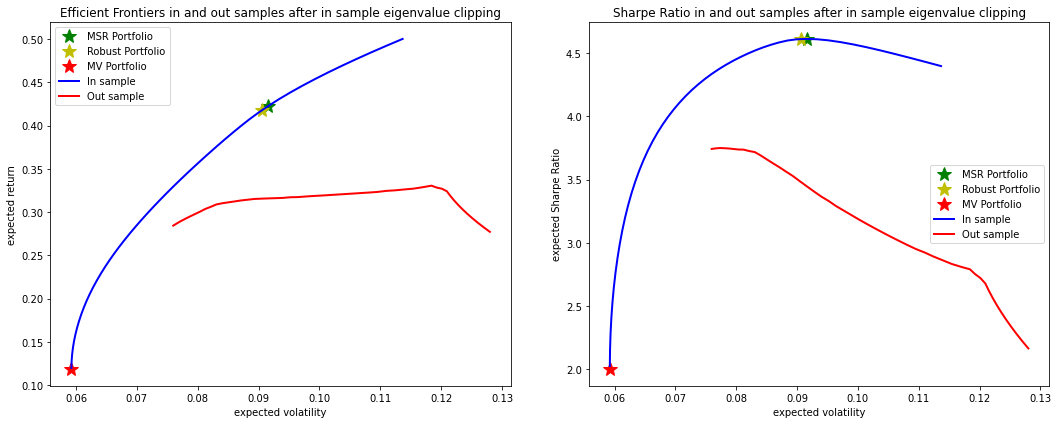

In [34]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(MSR_vol_clipped, MSR_ret_clipped, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax1.plot(robust_vol_clipped, robust_ret_clipped, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax1.plot(MV_vol_clipped, MV_ret_clipped, 'r*', markersize=15.0, label = 'MV Portfolio')
ax1.plot(tvols_clipped, trets_clipped, 'b', lw= 2.0, label = 'In sample')
ax1.plot(vol_out_clipped, ret_out_clipped, 'r', lw= 2.0, label = 'Out sample')
ax1.set_xlabel('expected volatility')
ax1.set_ylabel('expected return')
ax1.legend(loc = 'best')
ax1.set_title("Efficient Frontiers in and out samples after in sample eigenvalue clipping")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(MSR_vol_clipped, MSR_ret_clipped/MSR_vol_clipped, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax2.plot(robust_vol_clipped, robust_ret_clipped/robust_vol_clipped, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax2.plot(MV_vol_clipped, MV_ret_clipped/MV_vol_clipped, 'r*', markersize=15.0, label = 'MV Portfolio')
ax2.plot(tvols_clipped, trets_clipped/tvols_clipped, 'b', lw= 2.0, label = 'In sample')
ax2.plot(vol_out_clipped, ret_out_clipped/vol_out_clipped, 'r', lw= 2.0, label = 'Out sample')
ax2.set_xlabel('expected volatility')
ax2.set_ylabel('expected Sharpe Ratio')
ax2.legend(loc = 'best')
ax2.set_title("Sharpe Ratio in and out samples after in sample eigenvalue clipping")

plt.tight_layout()
# plt.savefig('../../images/ch13/stat_13.png')
plt.show()




In [35]:
print(f"The MV portfolio has the following weights\n{np.round(MV_pf_clipped['x'],2)},\nhas a risk of {np.round(MV_vol_clipped * 100,2)}% and a return of {np.round(MV_ret_clipped * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MV_pf_clipped['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MV_pf_clipped['x'])[1],2)} stocks.\n")
print(f"The maximum SR portfolio has the following weights\n{np.round(MSR_pf_clipped['x'],2)},\nhas a risk of {np.round(MSR_vol_clipped * 100,2)}% and a return of {np.round(MSR_ret_clipped * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MSR_pf_clipped['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MSR_pf_clipped['x'])[1],2)} stocks.\n")
print(f"The robust portfolio has the following weights\n{np.round(robust_pf_clipped['x'],2)},\nhas a risk of {np.round(robust_vol_clipped * 100,2)}% and a return of {np.round(robust_ret_clipped * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(robust_pf_clipped['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(robust_pf_clipped['x'])[1],2)} stocks.\n")

The MV portfolio has the following weights
[0.2  0.29 0.   0.01 0.12 0.03 0.   0.17 0.01 0.16],
has a risk of 5.92% and a return of 11.85%.
It also has a effective diversification of 5.03 and 90% of weight are in  5 stocks.

The maximum SR portfolio has the following weights
[0.   0.37 0.   0.   0.   0.   0.03 0.6  0.   0.  ],
has a risk of 9.16% and a return of 42.25%.
It also has a effective diversification of 2.0 and 90% of weight are in  2 stocks.

The robust portfolio has the following weights
[0.   0.39 0.   0.   0.   0.   0.03 0.58 0.   0.  ],
has a risk of 9.06% and a return of 41.76%.
It also has a effective diversification of 2.04 and 90% of weight are in  2 stocks.



In [36]:
print(f"Using this portfolios in the future, we get: "\
     + f"\n - A return equal to {np.round(port_ret(robust_pf_clipped['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(robust_pf_clipped['x'], sp500_out_cov)*100,2)}% for the robust Portolio."
     + f"\n - A return equal to {np.round(port_ret(MV_pf_clipped['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MV_pf_clipped['x'], sp500_out_cov)*100,2)}% for the MV Portolio."
     + f"\n - A return equal to {np.round(port_ret(MSR_pf_clipped['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MSR_pf_clipped['x'], sp500_out_cov)*100,2)}% for the maximum SR Portolio.")

Using this portfolios in the future, we get: 
 - A return equal to 33.45% and a risk equal to 11.99% for the robust Portolio.
 - A return equal to 28.4% and a risk equal to 7.58% for the MV Portolio.
 - A return equal to 32.7% and a risk equal to 12.02% for the maximum SR Portolio.


### 3.7. Portfolios with the oracle estimator

In [37]:
sp500_in_star = sp500_in.iloc[:126-40].copy()
sp500_out_star = sp500_in.iloc[126-40:].copy()
sp500_in_star_cov = np.cov(sp500_in_star, rowvar = False, bias = True)
sp500_out_star_cov = np.cov(sp500_out_star, rowvar = False, bias = True)

sp500_in_cov_oracle = oracle_estimator(sp500_in_star_cov, sp500_out_star_cov)

In [38]:
trets_oracle, tvols_oracle, weights_oracle = efficient_frontier_in_sample(rets_means = sp500_in_means, rets_cov = sp500_in_cov_oracle, range_ret = (0.04, 0.6))

100%|██████████| 50/50 [00:01<00:00, 28.34it/s]


In [39]:
ret_out_oracle, vol_out_oracle = efficient_frontier_out_sample(weights_oracle, sp500_out_means, sp500_out_cov)

In [40]:
MV_pf_oracle, MV_vol_oracle, MV_ret_oracle = MV_portfolio(sp500_in_means, sp500_in_cov_oracle)

In [41]:
MSR_pf_oracle, MSR_vol_oracle, MSR_ret_oracle = Max_SR_portfolio(sp500_in_means, sp500_in_cov_oracle)

In [42]:
market_expectations = np.array([[0.0,0.75,0.75,-0.45,-0.5, 0, 0.5, 0, -0.5, 0.4]])  
w_active_oracle, rets_implicit_oracle, robust_pf_oracle, robust_vol_oracle, robust_ret_oracle = robust_portfolio(sp500_in_means, sp500_in_cov_oracle, sp500_in_cov_oracle, 13, 0.2, market_expectations)

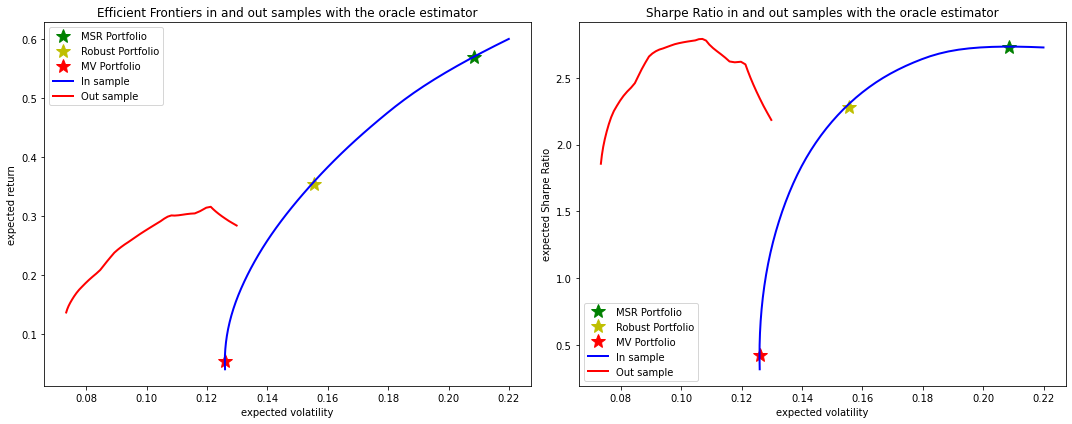

In [43]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(MSR_vol_oracle, MSR_ret_oracle, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax1.plot(robust_vol_oracle, robust_ret_oracle, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax1.plot(MV_vol_oracle, MV_ret_oracle, 'r*', markersize=15.0, label = 'MV Portfolio')
ax1.plot(tvols_oracle, trets_oracle, 'b', lw= 2.0, label = 'In sample')
ax1.plot(vol_out_oracle, ret_out_oracle, 'r', lw= 2.0, label = 'Out sample')
ax1.set_xlabel('expected volatility')
ax1.set_ylabel('expected return')
ax1.legend(loc = 'best')
ax1.set_title("Efficient Frontiers in and out samples with the oracle estimator")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(MSR_vol_oracle, MSR_ret_oracle/MSR_vol_oracle, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax2.plot(robust_vol_oracle, robust_ret_oracle/robust_vol_oracle, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax2.plot(MV_vol_oracle, MV_ret_oracle/MV_vol_oracle, 'r*', markersize=15.0, label = 'MV Portfolio')
ax2.plot(tvols_oracle, trets_oracle/tvols_oracle, 'b', lw= 2.0, label = 'In sample')
ax2.plot(vol_out_oracle, ret_out_oracle/vol_out_oracle, 'r', lw= 2.0, label = 'Out sample')
ax2.set_xlabel('expected volatility')
ax2.set_ylabel('expected Sharpe Ratio')
ax2.legend(loc = 'best')
ax2.set_title("Sharpe Ratio in and out samples with the oracle estimator")

plt.tight_layout()
# plt.savefig('../../images/ch13/stat_13.png')
plt.show()




In [44]:
print(f"The MV portfolio has the following weights\n{np.round(MV_pf_oracle['x'],2)},\nhas a risk of {np.round(MV_vol_oracle * 100,2)}% and a return of {np.round(MV_ret_oracle * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MV_pf_oracle['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MV_pf_oracle['x'])[1],2)} stocks.\n")
print(f"The maximum SR portfolio has the following weights\n{np.round(MSR_pf_oracle['x'],2)},\nhas a risk of {np.round(MSR_vol_oracle * 100,2)}% and a return of {np.round(MSR_ret_oracle * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MSR_pf_oracle['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MSR_pf_oracle['x'])[1],2)} stocks.\n")
print(f"The robust portfolio has the following weights\n{np.round(robust_pf_oracle['x'],2)},\nhas a risk of {np.round(robust_vol_oracle * 100,2)}% and a return of {np.round(robust_ret_oracle * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(robust_pf_oracle['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(robust_pf_oracle['x'])[1],2)} stocks.\n")

The MV portfolio has the following weights
[0.24 0.17 0.   0.1  0.17 0.07 0.   0.16 0.01 0.08],
has a risk of 12.59% and a return of 5.36%.
It also has a effective diversification of 6.15 and 90% of weight are in  6 stocks.

The maximum SR portfolio has the following weights
[0.   0.1  0.   0.   0.   0.   0.24 0.66 0.   0.  ],
has a risk of 20.85% and a return of 57.0%.
It also has a effective diversification of 1.99 and 90% of weight are in  3 stocks.

The robust portfolio has the following weights
[0.07 0.3  0.   0.02 0.03 0.   0.06 0.46 0.05 0.  ],
has a risk of 15.55% and a return of 35.47%.
It also has a effective diversification of 3.14 and 90% of weight are in  5 stocks.



In [45]:
print(f"Using this portfolios in the future, we get: "\
     + f"\n - A return equal to {np.round(port_ret(robust_pf_oracle['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(robust_pf_oracle['x'], sp500_out_cov)*100,2)}% for the robust Portolio."
     + f"\n - A return equal to {np.round(port_ret(MV_pf_oracle['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MV_pf_oracle['x'], sp500_out_cov)*100,2)}% for the MV Portolio."
     + f"\n - A return equal to {np.round(port_ret(MSR_pf_oracle['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MSR_pf_oracle['x'], sp500_out_cov)*100,2)}% for the maximum SR Portolio.")

Using this portfolios in the future, we get: 
 - A return equal to 26.91% and a risk equal to 10.12% for the robust Portolio.
 - A return equal to 14.32% and a risk equal to 7.38% for the MV Portolio.
 - A return equal to 29.41% and a risk equal to 12.65% for the maximum SR Portolio.


### 3.8. Portfolios and Cross Validate Eigenvalue Shrinkage

In [47]:
lambda_cv, lambda_cv_iso, sp500_in_cov_cv = CVshrink(sp500_in)

In [48]:
trets_cv, tvols_cv, weights_cv = efficient_frontier_in_sample(rets_means = sp500_in_means, rets_cov = sp500_in_cov_cv, range_ret = (0.04, 0.7))

100%|██████████| 50/50 [00:02<00:00, 18.21it/s]


In [49]:
ret_out_cv, vol_out_cv = efficient_frontier_out_sample(weights_cv, sp500_out_means, sp500_out_cov)

In [50]:
MSR_pf_cv, MSR_vol_cv, MSR_ret_cv = Max_SR_portfolio(sp500_in_means, sp500_in_cov_cv)

In [51]:
MV_pf_cv, MV_vol_cv, MV_ret_cv = MV_portfolio(sp500_in_means, sp500_in_cov_cv)

In [52]:
market_expectations = np.array([[0.0,0.75,0.75,-0.45,-0.5, 0, 0.5, 0, -0.5, 0.4]])  
w_active_cv, rets_implicit_cv, robust_pf_cv, robust_vol_cv, robust_ret_cv = robust_portfolio(sp500_in_means, sp500_in_cov_cv, sp500_in_cov_cv, 13, 0.2, market_expectations)

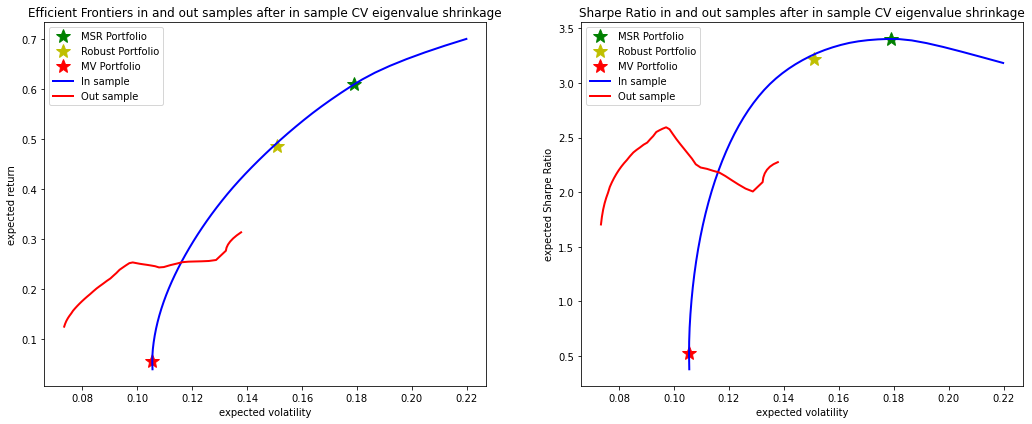

In [53]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(MSR_vol_cv, MSR_ret_cv, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax1.plot(robust_vol_cv, robust_ret_cv, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax1.plot(MV_vol_cv, MV_ret_cv, 'r*', markersize=15.0, label = 'MV Portfolio')
ax1.plot(tvols_cv, trets_cv, 'b', lw= 2.0, label = 'In sample')
ax1.plot(vol_out_cv, ret_out_cv, 'r', lw= 2.0, label = 'Out sample')
ax1.set_xlabel('expected volatility')
ax1.set_ylabel('expected return')
ax1.legend(loc = 'best')
ax1.set_title("Efficient Frontiers in and out samples after in sample CV eigenvalue shrinkage")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(MSR_vol_cv, MSR_ret_cv/MSR_vol_cv, 'g*', markersize=15.0, label = 'MSR Portfolio')
ax2.plot(robust_vol_cv, robust_ret_cv/robust_vol_cv, 'y*', markersize=15.0, label = 'Robust Portfolio')
ax2.plot(MV_vol_cv, MV_ret_cv/MV_vol_cv, 'r*', markersize=15.0, label = 'MV Portfolio')
ax2.plot(tvols_cv, trets_cv/tvols_cv, 'b', lw= 2.0, label = 'In sample')
ax2.plot(vol_out_cv, ret_out_cv/vol_out_cv, 'r', lw= 2.0, label = 'Out sample')
ax2.set_xlabel('expected volatility')
ax2.set_ylabel('expected Sharpe Ratio')
ax2.legend(loc = 'best')
ax2.set_title("Sharpe Ratio in and out samples after in sample CV eigenvalue shrinkage")

plt.tight_layout()
# plt.savefig('../../images/ch13/stat_13.png')
plt.show()




In [54]:
print(f"The MV portfolio has the following weights\n{np.round(MV_pf_cv['x'],2)},\nhas a risk of {np.round(MV_vol_cv * 100,2)}% and a return of {np.round(MV_ret_cv * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MV_pf_cv['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MV_pf_cv['x'])[1],2)} stocks.\n")
print(f"The maximum SR portfolio has the following weights\n{np.round(MSR_pf_cv['x'],2)},\nhas a risk of {np.round(MSR_vol_cv * 100,2)}% and a return of {np.round(MSR_ret_cv * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(MSR_pf_cv['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(MSR_pf_cv['x'])[1],2)} stocks.\n")
print(f"The robust portfolio has the following weights\n{np.round(robust_pf_cv['x'],2)},\nhas a risk of {np.round(robust_vol_cv * 100,2)}% and a return of {np.round(robust_ret_cv * 100,2)}%.\nIt also has a effective diversification of {np.round(portfolio_metrics(robust_pf_cv['x'])[0],2)} and 90% of weight are in  {np.round(portfolio_metrics(robust_pf_cv['x'])[1],2)} stocks.\n")

The MV portfolio has the following weights
[0.2  0.2  0.   0.11 0.1  0.12 0.   0.15 0.01 0.12],
has a risk of 10.55% and a return of 5.59%.
It also has a effective diversification of 6.65 and 90% of weight are in  7 stocks.

The maximum SR portfolio has the following weights
[0.   0.   0.   0.   0.   0.   0.28 0.7  0.02 0.  ],
has a risk of 17.91% and a return of 60.97%.
It also has a effective diversification of 1.74 and 90% of weight are in  2 stocks.

The robust portfolio has the following weights
[0.   0.25 0.   0.   0.02 0.   0.21 0.45 0.07 0.  ],
has a risk of 15.11% and a return of 48.62%.
It also has a effective diversification of 3.22 and 90% of weight are in  3 stocks.



In [55]:
print(f"Using this portfolios in the future, we get: "\
     + f"\n - A return equal to {np.round(port_ret(robust_pf_cv['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(robust_pf_cv['x'], sp500_out_cov)*100,2)}% for the robust Portolio."
     + f"\n - A return equal to {np.round(port_ret(MV_pf_cv['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MV_pf_cv['x'], sp500_out_cov)*100,2)}% for the MV Portolio."
     + f"\n - A return equal to {np.round(port_ret(MSR_pf_cv['x'], sp500_out_means)*100,2)}% and a risk equal to {np.round(port_vol(MSR_pf_cv['x'], sp500_out_cov)*100,2)}% for the maximum SR Portolio.")

Using this portfolios in the future, we get: 
 - A return equal to 27.51% and a risk equal to 10.79% for the robust Portolio.
 - A return equal to 13.27% and a risk equal to 7.38% for the MV Portolio.
 - A return equal to 26.37% and a risk equal to 12.97% for the maximum SR Portolio.


## 4. Eigenvalue distribution

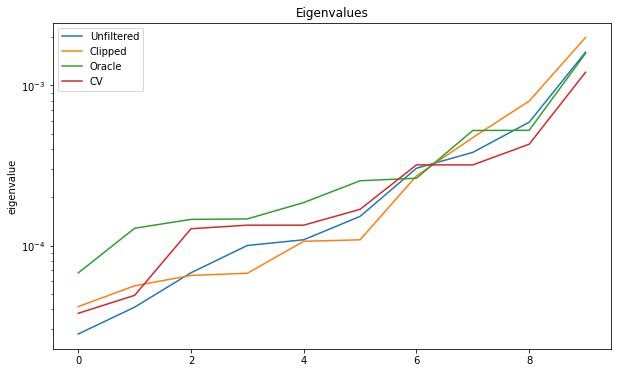

In [56]:
plt.figure(figsize = (10,6))
plt.plot(np.linalg.eigh(sp500_in_cov)[0], label = 'Unfiltered')
plt.plot(np.linalg.eigh(sp500_in_cov_clipped)[0], label = 'Clipped')
plt.plot(np.linalg.eigh(sp500_in_cov_oracle)[0], label = 'Oracle')
plt.plot(np.linalg.eigh(sp500_in_cov_cv)[0], label = 'CV')
plt.yscale('log')
plt.legend(loc = 'best')
plt.ylabel('eigenvalue')
plt.title('Eigenvalues')
plt.show()

###4.1. Time evolution

In [57]:
def transaction_cost(w1, w2, p = 0.0002):
    w1, w2 = np.array(w1), np.array(w2)
    return 1 - p * np.sum(np.abs(w1 - w2))

In [58]:
def calcul_turnover(w_list): 
    n = len(w_list)
    turnover = 0
    for i in range(1, n):
        turnover += np.sum(np.abs(w_list[i-1] - w_list[i]))
    return turnover/n

In [59]:
def cumulative_return(data = sp500, T = 30):
    nb_equity = len(data.T)
    c_unfiltered, c_clipping, c_cvshrink, c_oracle = [1],[1],[1],[1]
    ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle = [],[],[],[]
    turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle = [],[],[],[]
    Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle=[],[],[],[]
    w_pre_unfiltered, w_pre_clipping, w_pre_cvshrink, w_pre_oracle = np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,])
    
    for t in tqdm(range(T)):
        ret = np.array(data.iloc[1000+t])
        
        sp500_in = data.iloc[1000-126+t:1000+t]
        sp500_in_star = sp500_in.iloc[:126-30].copy()
        sp500_out_star = sp500_in.iloc[126-30:].copy()
        
        sp500_in_means = np.array(sp500_in.mean())
        
        covariance_unfiltered = np.cov(sp500_in, rowvar = False, bias = True) 
        covariance_clipped = sigma_c(covariance_unfiltered)
        covariance_cvshrink = CVshrink(sp500_in)[2]
        covariance_oracle = oracle_estimator(np.cov(sp500_in_star, rowvar = False, bias = True),np.cov(sp500_out_star, rowvar = False, bias = True))
        
        MSR_pf_unfiltered, MSR_vol_unfiltered, MSR_ret_unfiltered = Max_SR_portfolio(sp500_in_means, covariance_unfiltered)
        MSR_pf_clipped, MSR_vol_clipped, MSR_ret_clipped = Max_SR_portfolio(sp500_in_means, covariance_clipped)
        MSR_pf_oracle, MSR_vol_oracle, MSR_ret_oracle = Max_SR_portfolio(sp500_in_means, covariance_oracle)
        MSR_pf_cv, MSR_vol_cv, MSR_ret_cv = Max_SR_portfolio(sp500_in_means, covariance_cvshrink)
       
        c_unfiltered.append(c_unfiltered[-1] * transaction_cost(w_pre_unfiltered, MSR_pf_unfiltered['x']) * (np.sum(MSR_pf_unfiltered['x'] * (ret + 1))))
        c_clipping.append(c_clipping[-1] * transaction_cost(w_pre_clipping, MSR_pf_clipped['x']) * (np.sum(MSR_pf_clipped['x'] * (ret + 1))))
        c_cvshrink.append(c_cvshrink[-1] * transaction_cost(w_pre_cvshrink, MSR_pf_cv['x']) * (np.sum(MSR_pf_cv['x'] * (ret + 1))))
        c_oracle.append(c_oracle[-1] * transaction_cost(w_pre_oracle, MSR_pf_oracle['x']) * (np.sum(MSR_pf_oracle['x'] * (ret + 1))))
        
        Risk_unfiltered.append(MSR_vol_unfiltered)
        Risk_clipping.append(MSR_vol_clipped)
        Risk_cvshrink.append(MSR_vol_cv)
        Risk_oracle.append(MSR_vol_oracle)
        
        ret_unfiltered.append(MSR_ret_unfiltered)
        ret_clipping.append(MSR_ret_clipped)
        ret_cvshrink.append(MSR_ret_cv)
        ret_oracle.append(MSR_ret_oracle)

        turnover_unfiltered.append(calcul_turnover([MSR_pf_unfiltered['x'],w_pre_unfiltered]))
        turnover_clipping.append(calcul_turnover([MSR_pf_clipped['x'],w_pre_clipping]))
        turnover_cvshrink.append(calcul_turnover([MSR_pf_cv['x'],w_pre_cvshrink]))
        turnover_oracle.append(calcul_turnover([MSR_pf_oracle['x'],w_pre_oracle]))
        
        w_pre_unfiltered, w_pre_clipping, w_pre_cvshrink, w_pre_oracle = MSR_pf_unfiltered['x'], MSR_pf_clipped['x'], MSR_pf_cv['x'], MSR_pf_oracle['x']
        
    return c_unfiltered[1:], c_clipping[1:], c_cvshrink[1:], c_oracle[1:], ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle, Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle,  turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle

In [60]:
c_unfiltered, c_clipping, c_cvshrink, c_oracle, ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle, Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle,turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle = cumulative_return(T = 90)

100%|██████████| 90/90 [00:40<00:00,  2.22it/s]


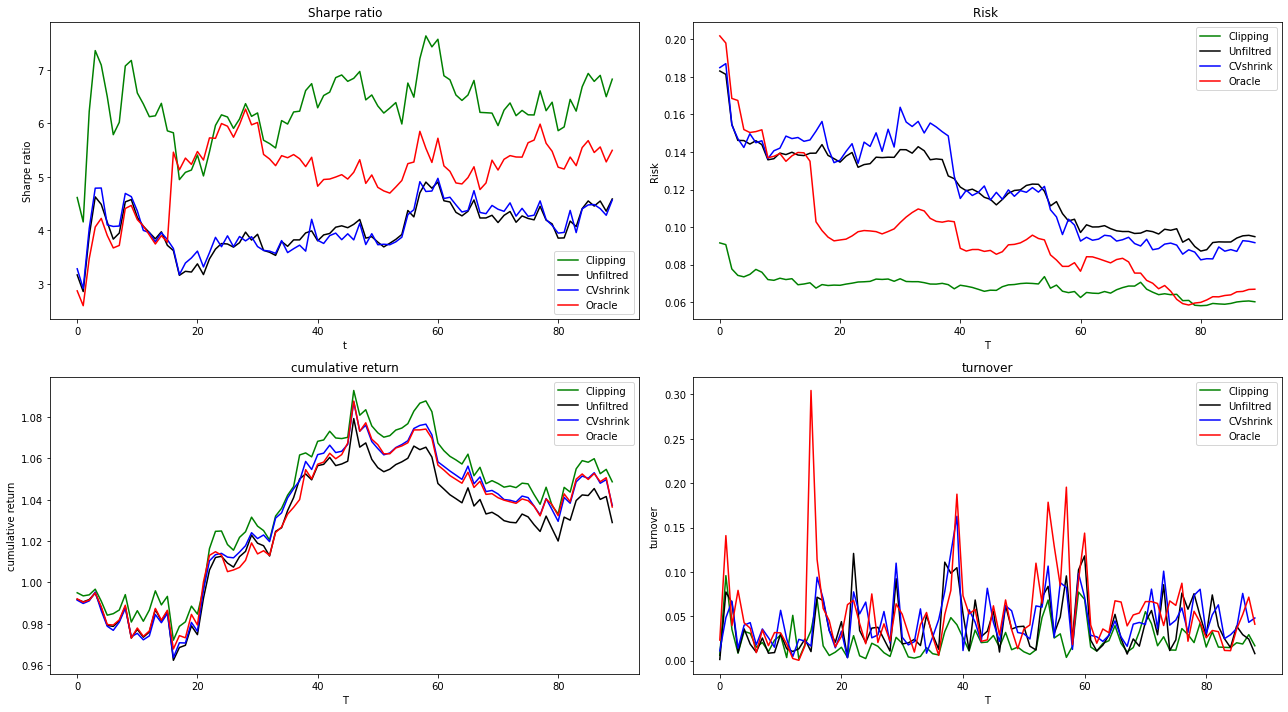

In [61]:
fig = plt.figure(figsize = (18,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(np.array(ret_clipping)/np.array(Risk_clipping), label = 'Clipping', color = 'green')
ax1.plot(np.array(ret_unfiltered)/np.array(Risk_unfiltered), label = 'Unfiltred', color = 'black')
ax1.plot(np.array(ret_cvshrink)/np.array(Risk_cvshrink), label = 'CVshrink', color = 'blue')
ax1.plot(np.array(ret_oracle)/np.array(Risk_oracle), label = 'Oracle', color = 'red')
ax1.legend(loc = 'best')
ax1.set_title('Sharpe ratio')
ax1.set_xlabel('t')
ax1.set_ylabel('Sharpe ratio')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(Risk_clipping, label = 'Clipping', color = 'green')
ax2.plot(Risk_unfiltered, label = 'Unfiltred', color = 'black')
ax2.plot(Risk_cvshrink, label = 'CVshrink', color = 'blue')
ax2.plot(Risk_oracle, label = 'Oracle', color = 'red')
ax2.legend(loc = 'best')
ax2.set_title('Risk ')
ax2.set_xlabel('T')
ax2.set_ylabel('Risk')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(c_clipping, label = 'Clipping', color = 'green')
ax3.plot(c_unfiltered, label = 'Unfiltred', color = 'black')
ax3.plot(c_cvshrink, label = 'CVshrink', color = 'blue')
ax3.plot(c_oracle, label = 'Oracle', color = 'red')
ax3.legend(loc = 'best')
ax3.set_title('cumulative return')
ax3.set_xlabel('T')
ax3.set_ylabel('cumulative return')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(turnover_clipping[1:], label = 'Clipping', color = 'green')
ax4.plot(turnover_unfiltered[1:], label = 'Unfiltred', color = 'black')
ax4.plot(turnover_cvshrink[1:], label = 'CVshrink', color = 'blue')
ax4.plot(turnover_oracle[1:], label = 'Oracle', color = 'red')
ax4.legend(loc = 'best')
ax4.set_title('turnover')
ax4.set_xlabel('T')
ax4.set_ylabel('turnover')


plt.tight_layout()
plt.show()

### 4.2. With free-risk asset

In [62]:
weights = MSR_pf_unfiltered['x'] 
rf=0.1

Below, we calculate random portofolios for the graph

In [63]:
prets = []
pvols = []
for p in range (100000): 
    weightsp =weights+np.random.random(10)/10 ##to have more points near the curve
    weightsp /= np.sum(weightsp)  
    prets.append(port_ret(weightsp,sp500_in_means))  
    pvols.append(port_vol(weightsp,sp500_in_cov))  
 
    weightsp =weights+np.random.random(10)/3
    weightsp /= np.sum(weightsp)  
    prets.append(port_ret(weightsp,sp500_in_means))  
    pvols.append(port_vol(weightsp,sp500_in_cov))
 
    weightsp =np.random.random(10)
    weightsp /= np.sum(weightsp)  
    prets.append(port_ret(weightsp,sp500_in_means))  
    pvols.append(port_vol(weightsp,sp500_in_cov))
    
    
prets = np.array(prets)
pvols = np.array(pvols)

In [64]:
# The approach is to fix the target Return and derive portfolio weights 
# that leads to the minimum volatility value

cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x,sp500_in_means) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

bnds = tuple((0, 1) for x in weights)


trets = np.linspace(0.05, 0.8, 200)
tvols = []
for tret in trets:  
    res = sco.minimize(port_vol, weights,sp500_in_cov, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)



In [65]:
ind = np.argmin(tvols)  
evols = tvols[ind:]
erets = trets[ind:]

tck = sci.splrep(evols, erets)
# x-values must be sorted from smallest to biggest
# Data Index must be used
# return a (ndarray with shape (38,), ndarray with shape (38,), 3)

We want to calculate the Capital market line (CML) which is the tangent line drawn from the point of the risk-free asset to the feasible region for risky assets. The tangency point M represents the market portfolio, so named since all rational investors (minimum variance criterion) should hold their risky assets in the same proportions as their weights in the market portfolio.

In [66]:
def f(x,tck=tck):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)

def df(x,tck=tck):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p,tck=tck, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2],tck)  
    eq3 = p[1] - df(p[2],tck)  
    return eq1, eq2, eq3

In [67]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15]) 

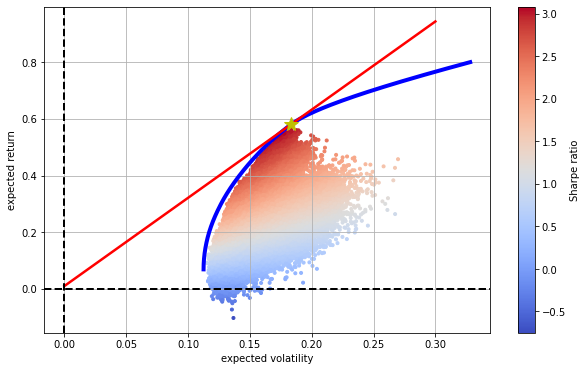

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=2.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [69]:

def capital_line_portfolio(part_risk_free,rets_means = sp500_in_means, rets_cov = sp500_in_cov):
    trets = np.linspace(0.1, 0.6, 80)
    tvols = []
    for tret in trets:  
        cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x,rets_means) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
        res = sco.minimize(port_vol, weights,rets_cov, method='SLSQP',
                           bounds=bnds, constraints=cons)  
        tvols.append(res['fun'])
    tvols = np.array(tvols)
    
    ind = np.argmin(tvols)     
    evols = tvols[ind:]
    erets = trets[ind:]

    tck = sci.splrep(evols, erets)
    
    opt = np.array(sco.fsolve(equations, [0.01, 0.5, 0.15]) ) #we have calculate the intersection point
    
    ##We have to calculate the weights related to the point
    cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x,rets_means) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
    res = sco.minimize(port_vol, weights,rets_cov, method='SLSQP',
                   bounds=bnds, constraints=cons)
    
    return np.append(((1-part_risk_free)*res['x']),part_risk_free), (1-part_risk_free)*port_vol(res['x'],rets_cov), (1-part_risk_free)*port_ret(res['x'],rets_means)+part_risk_free*rf


In [70]:
def cumulative_return_fr_list(list_part_risk_free,data = sp500, T = 30):
    
    list_SR=[]
    list_risk=[]
    list_cr=[]
    list_turnover=[]
    
    for part_risk_free in list_part_risk_free:
        nb_equity = len(data.T)+1
        c_clipping = [1]
        ret_clipping= []
        Risk_clipping=[]
        turnover_clipping= []
        w_pre_clipping = np.array(nb_equity * [1. / nb_equity,])

        for t in tqdm(range(T)):
            ret = np.append(data.iloc[1000+t],0.04/252)

            sp500_in = data.iloc[1000-126+t:1000+t]
            sp500_in_star = sp500_in.iloc[:126-30].copy()
            sp500_out_star = sp500_in.iloc[126-30:].copy()

            sp500_in_means = np.array(sp500_in.mean())

            covariance_unfiltered = np.cov(sp500_in, rowvar = False, bias = True) 
            covariance_clipped = sigma_c(covariance_unfiltered)

            CL_pf_clipped, CL_vol_clipped, CL_ret_clipped = capital_line_portfolio(part_risk_free,sp500_in_means, covariance_clipped)

            c_clipping.append(c_clipping[-1] * transaction_cost(w_pre_clipping, CL_pf_clipped) * (np.sum(CL_pf_clipped * (ret + 1))))

            Risk_clipping.append(CL_vol_clipped)

            ret_clipping.append(CL_ret_clipped)

            turnover_clipping.append(calcul_turnover([CL_pf_clipped,w_pre_clipping]))

            w_pre_clipping= CL_pf_clipped

        list_SR.append(np.mean(ret_clipping)/np.mean(Risk_clipping)) 
        list_risk.append(np.mean(Risk_clipping))
        list_cr.append(c_clipping[-1]**(252/T))
        list_turnover.append(np.mean(turnover_clipping))
        
    return list_SR,list_risk,list_cr,list_turnover

In [71]:
list_part_risk_free=np.arange(0,20)/20
list_SR,list_risk,list_cr,list_turnover=cumulative_return_fr_list(list_part_risk_free,sp500, T = 30)

100%|██████████| 30/30 [00:22<00:00,  1.35it/s]


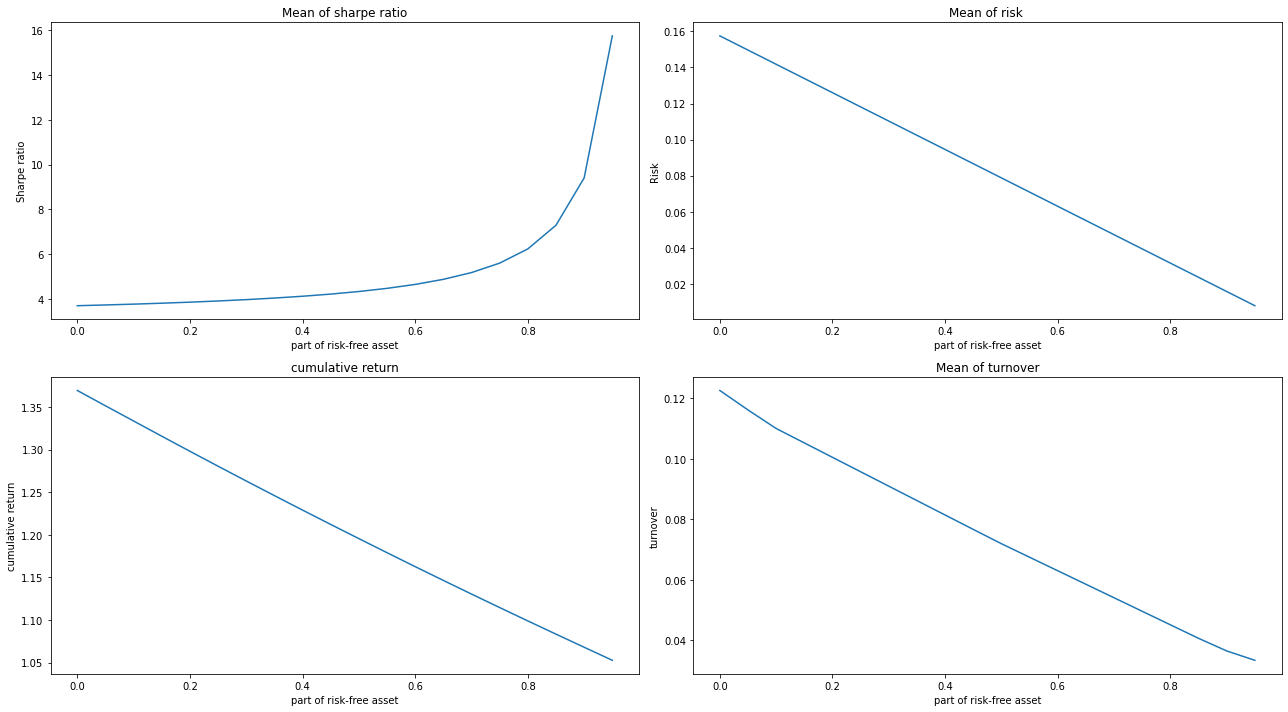

In [72]:
fig = plt.figure(figsize = (18,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(list_part_risk_free,list_SR)
ax1.set_title('Mean of sharpe ratio')
ax1.set_xlabel('part of risk-free asset')
ax1.set_ylabel('Sharpe ratio')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(list_part_risk_free,list_risk)
ax2.set_title('Mean of risk ')
ax2.set_xlabel('part of risk-free asset')
ax2.set_ylabel('Risk')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(list_part_risk_free,list_cr)
ax3.set_title('cumulative return')
ax3.set_xlabel('part of risk-free asset')
ax3.set_ylabel('cumulative return')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(list_part_risk_free,list_turnover)
ax4.set_title('Mean of turnover')
ax4.set_xlabel('part of risk-free asset')
ax4.set_ylabel('turnover')


plt.tight_layout()
plt.show()

We remark that the cumulative return, the risk and the turnover are linear because of the additivity of these metrics for independant stocks (the risk-free asset is not correlated with the market).
The growth of the sharpe ratio could be explained by no volatility for the risk-free asset.

In [73]:
def cumulative_return_fr(part_risk_free,data = sp500, T = 30):
    nb_equity = len(data.T)+1
    c_unfiltered, c_clipping, c_cvshrink, c_oracle = [1],[1],[1],[1]
    ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle = [],[],[],[]
    Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle=[],[],[],[]
    turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle = [],[],[],[]
    w_pre_unfiltered, w_pre_clipping, w_pre_cvshrink, w_pre_oracle = np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,]), np.array(nb_equity * [1. / nb_equity,])
    
    for t in tqdm(range(T)):
        ret = np.append(data.iloc[1000+t],0.04/252)
        
        sp500_in = data.iloc[1000-126+t:1000+t]
        sp500_in_star = sp500_in.iloc[:126-30].copy()
        sp500_out_star = sp500_in.iloc[126-30:].copy()
        
        sp500_in_means = np.array(sp500_in.mean())
        
        covariance_unfiltered = np.cov(sp500_in, rowvar = False, bias = True) 
        covariance_clipped = sigma_c(covariance_unfiltered)
        covariance_cvshrink = CVshrink(sp500_in)[2]
        covariance_oracle = oracle_estimator(np.cov(sp500_in_star, rowvar = False, bias = True),np.cov(sp500_out_star, rowvar = False, bias = True))
        
        CL_pf_unfiltered, CL_vol_unfiltered, CL_ret_unfiltered = capital_line_portfolio(part_risk_free,sp500_in_means, covariance_unfiltered)
        CL_pf_clipped, CL_vol_clipped, CL_ret_clipped = capital_line_portfolio(part_risk_free,sp500_in_means, covariance_clipped)
        CL_pf_oracle, CL_vol_oracle, CL_ret_oracle = capital_line_portfolio(part_risk_free,sp500_in_means, covariance_oracle)
        CL_pf_cv, CL_vol_cv, CL_ret_cv = capital_line_portfolio(part_risk_free,sp500_in_means, covariance_cvshrink)
        
       
        c_unfiltered.append(c_unfiltered[-1] * transaction_cost(w_pre_unfiltered, CL_pf_unfiltered) * (np.sum(CL_pf_unfiltered * (ret + 1))))
        c_clipping.append(c_clipping[-1] * transaction_cost(w_pre_clipping, CL_pf_clipped) * (np.sum(CL_pf_clipped * (ret + 1))))
        c_cvshrink.append(c_cvshrink[-1] * transaction_cost(w_pre_cvshrink, CL_pf_cv) * (np.sum(CL_pf_cv * (ret + 1))))
        c_oracle.append(c_oracle[-1] * transaction_cost(w_pre_oracle, CL_pf_oracle) * (np.sum(CL_pf_oracle * (ret + 1))))
        
        Risk_unfiltered.append(CL_vol_unfiltered)
        Risk_clipping.append(CL_vol_clipped)
        Risk_cvshrink.append(CL_vol_cv)
        Risk_oracle.append(CL_vol_oracle)
        
        ret_unfiltered.append(CL_ret_unfiltered)
        ret_clipping.append(CL_ret_clipped)
        ret_cvshrink.append(CL_ret_cv)
        ret_oracle.append(CL_ret_oracle)
        
        turnover_unfiltered.append(calcul_turnover([CL_pf_unfiltered,w_pre_unfiltered]))
        turnover_clipping.append(calcul_turnover([CL_pf_clipped,w_pre_clipping]))
        turnover_cvshrink.append(calcul_turnover([CL_pf_cv,w_pre_cvshrink]))
        turnover_oracle.append(calcul_turnover([CL_pf_oracle,w_pre_oracle]))
        
        w_pre_unfiltered, w_pre_clipping, w_pre_cvshrink, w_pre_oracle = CL_pf_unfiltered, CL_pf_clipped, CL_pf_cv, CL_pf_oracle
        
    return c_unfiltered[1:], c_clipping[1:], c_cvshrink[1:], c_oracle[1:], ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle, Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle,turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle

In [74]:
c_unfiltered, c_clipping, c_cvshrink, c_oracle, ret_unfiltered, ret_clipping, ret_cvshrink, ret_oracle, Risk_unfiltered, Risk_clipping, Risk_cvshrink, Risk_oracle,turnover_unfiltered, turnover_clipping, turnover_cvshrink, turnover_oracle = cumulative_return_fr(0.3,T = 30)

100%|██████████| 30/30 [01:45<00:00,  3.52s/it]


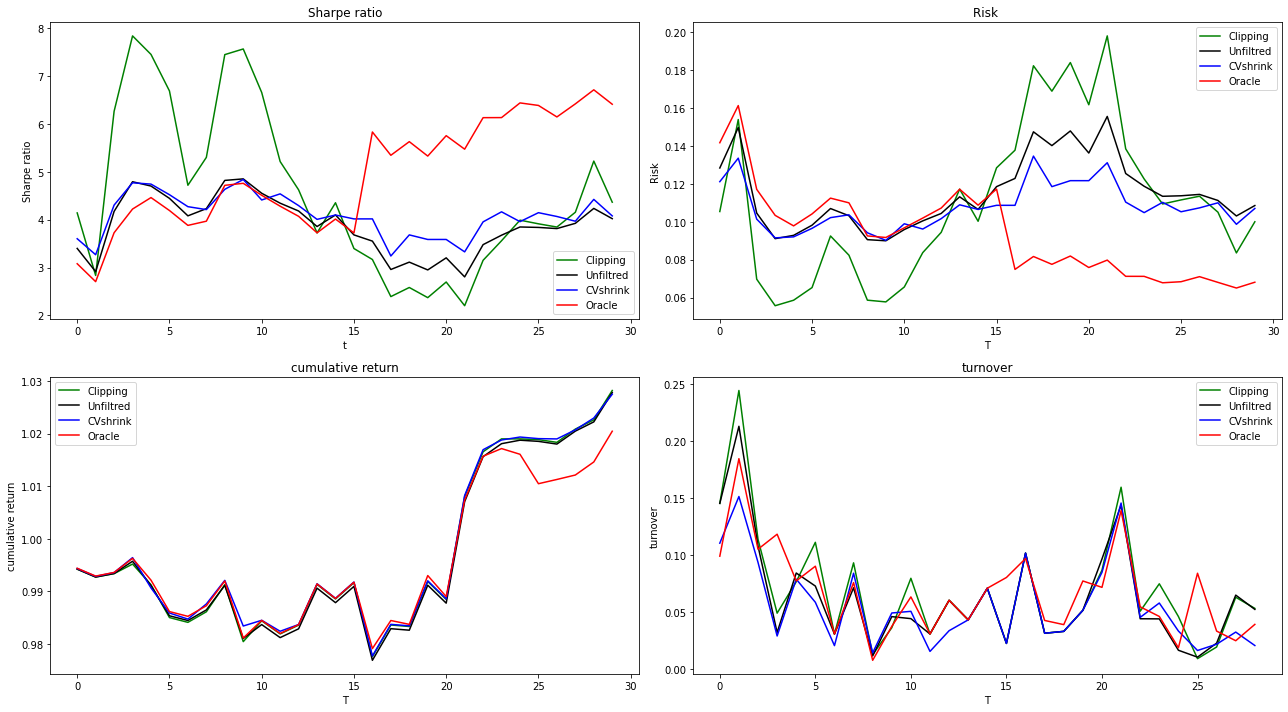

In [75]:
fig = plt.figure(figsize = (18,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(np.array(ret_clipping)/np.array(Risk_clipping), label = 'Clipping', color = 'green')
ax1.plot(np.array(ret_unfiltered)/np.array(Risk_unfiltered), label = 'Unfiltred', color = 'black')
ax1.plot(np.array(ret_cvshrink)/np.array(Risk_cvshrink), label = 'CVshrink', color = 'blue')
ax1.plot(np.array(ret_oracle)/np.array(Risk_oracle), label = 'Oracle', color = 'red')
ax1.legend(loc = 'best')
ax1.set_title('Sharpe ratio')
ax1.set_xlabel('t')
ax1.set_ylabel('Sharpe ratio')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(Risk_clipping, label = 'Clipping', color = 'green')
ax2.plot(Risk_unfiltered, label = 'Unfiltred', color = 'black')
ax2.plot(Risk_cvshrink, label = 'CVshrink', color = 'blue')
ax2.plot(Risk_oracle, label = 'Oracle', color = 'red')
ax2.legend(loc = 'best')
ax2.set_title('Risk ')
ax2.set_xlabel('T')
ax2.set_ylabel('Risk')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(c_clipping, label = 'Clipping', color = 'green')
ax3.plot(c_unfiltered, label = 'Unfiltred', color = 'black')
ax3.plot(c_cvshrink, label = 'CVshrink', color = 'blue')
ax3.plot(c_oracle, label = 'Oracle', color = 'red')
ax3.legend(loc = 'best')
ax3.set_title('cumulative return')
ax3.set_xlabel('T')
ax3.set_ylabel('cumulative return')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(turnover_clipping[1:], label = 'Clipping', color = 'green')
ax4.plot(turnover_unfiltered[1:], label = 'Unfiltred', color = 'black')
ax4.plot(turnover_cvshrink[1:], label = 'CVshrink', color = 'blue')
ax4.plot(turnover_oracle[1:], label = 'Oracle', color = 'red')
ax4.legend(loc = 'best')
ax4.set_title('turnover')
ax4.set_xlabel('T')
ax4.set_ylabel('turnover')


plt.tight_layout()
plt.show()